# Test examples

Theoretical sine transform pairs.

In [1]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt

import fftpack

# Style adjustments
%matplotlib inline
plt.style.use('ggplot')
rcParams['text.usetex'] = True
rcParams['font.serif'] = 'Computer Modern Roman'
rcParams['font.family'] = 'serif'
rcParams['font.style'] = 'normal'

In [2]:
def printfig(w, fw, t, ft, fftl, title):
    fig = plt.figure(figsize=(10,8))
    plt.subplots_adjust(wspace=.3, hspace=.3)
    plt.suptitle(title, y=1.01, fontsize=18)

    plt.subplot(221)
    plt.title(r'Frequency domain')
    plt.xlabel('Angular frequency $\omega$ (Hz)')
    plt.ylabel(r'Amplitude')
    plt.semilogx(w, fw, 'k-')

    plt.subplot(222)
    plt.title(r'Time domain')
    plt.xlabel('Time $t$ (s)')
    plt.ylabel(r'Amplitude')
    plt.loglog(t, ft, 'k-', label='Analytical')
    plt.plot(t, fftl, 'r-', label='FFTLog')
    plt.xlim([t.min(), t.max()])
    plt.legend(loc='best')

    plt.subplot(223)
    plt.title('Absolute error')
    plt.xlabel('Time $t$ (s)')
    plt.ylabel('Absolute error')
    plt.loglog(t, abs(fftl-ft), 'r-')

    plt.subplot(224)
    plt.title('Relative error')
    plt.xlabel('Time $t$ (s)')
    plt.ylabel('Relative error (-)')
    plt.loglog(t, abs(fftl-ft)/ft, 'r-')

    plt.show()

# FFTLog parameters

In [3]:
wmin, wmax, n = -4, 4, 512
q = 0
mu = 0.5
w, t, dlnr, kr, rk = fftpack.rfftlogargs(start=wmin, stop=wmax, num=n, mu=mu, q=q, kr=1, kropt=1)
rk /= 2/np.pi  # Scaling

## (1) $\qquad \frac{\pi}{4}\exp(-\omega)\sin(\omega) \Longleftrightarrow \frac{t}{4 + t^4}$

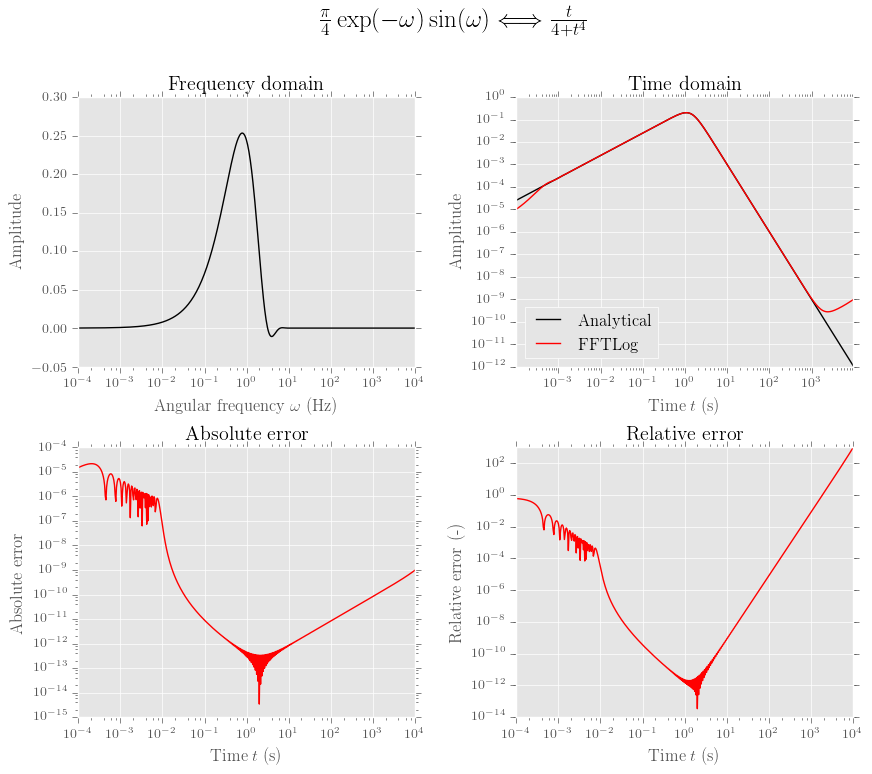

In [4]:
# Analytical solution
fw = np.pi/4*np.exp(-w)*np.sin(w)  # Frequency domain
ft = t/(4 + t**4)                  # Time domain
title = r'$\frac{\pi}{4}\exp(-\omega)\sin(\omega) \Longleftrightarrow \frac{t}{4 + t^4}$'

# FFTLog
fftl = fftpack.rfftl(fw, dlnr=dlnr, mu=0.5, q=q, kr=kr, rk=rk)
fftl *= 2/np.pi  # Scaling back

# Print result
printfig(w, fw, t, ft, fftl, title)

## (2) $\qquad \frac{\pi}{2}\exp(-a\omega) \Longleftrightarrow \frac{t}{t^2 + a^2}; \quad a=2$

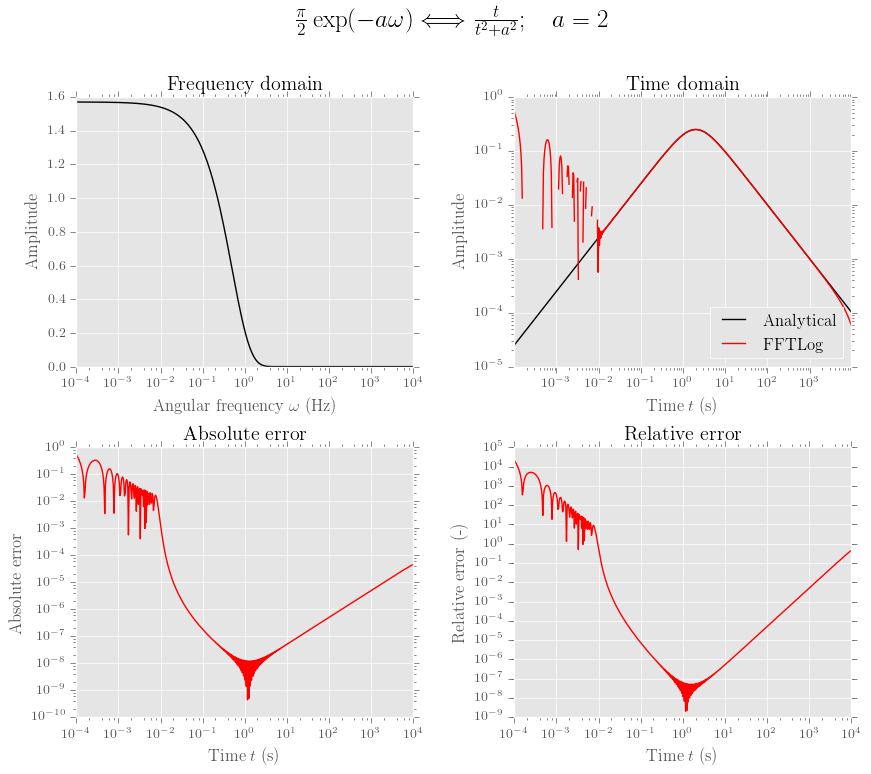

In [5]:
# Analytical solution
a=2
fw = np.pi/2*np.exp(-a*w)  # Frequency domain
ft = t/(t**2+a**2)         # Time domain
title = r'$\frac{\pi}{2}\exp(-a\omega) \Longleftrightarrow \frac{t}{t^2 + a^2}; \quad a=2$'

# FFTLog
fftl = fftpack.rfftl(fw, dlnr=dlnr, mu=0.5, q=q, kr=kr, rk=rk)
fftl *= 2/np.pi

# Print result
printfig(w, fw, t, ft, fftl, title)

## (3) $\qquad \sqrt{\frac{\pi}{2\omega}} \Longleftrightarrow \frac{1}{\sqrt{t}}$

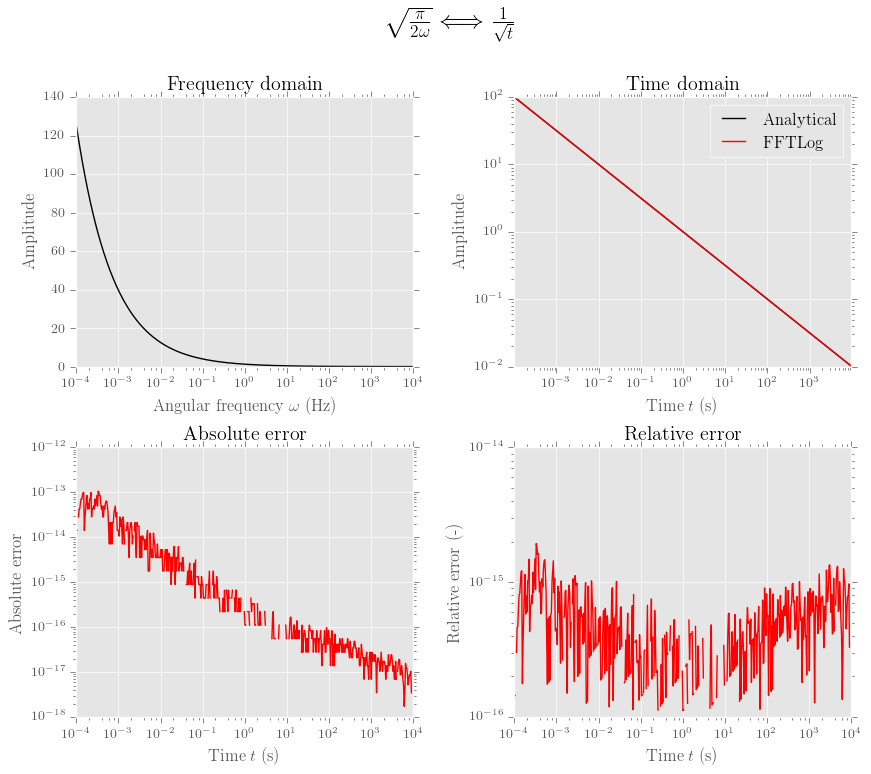

In [6]:
# Analytical solution
fw = np.sqrt(np.pi/2/w)  # Frequency domain
ft = 1/np.sqrt(t)        # Time domain
title = r'$\sqrt{\frac{\pi}{2\omega}} \Longleftrightarrow \frac{1}{\sqrt{t}}$'

# FFTLog
fftl = fftpack.rfftl(fw, dlnr=dlnr, mu=0.5, q=q, kr=kr, rk=rk)
fftl *= 2/np.pi

# Print result
printfig(w, fw, t, ft, fftl, title)

## (4) $\qquad \frac{\pi}{2} \Longleftrightarrow \frac{1}{t}$

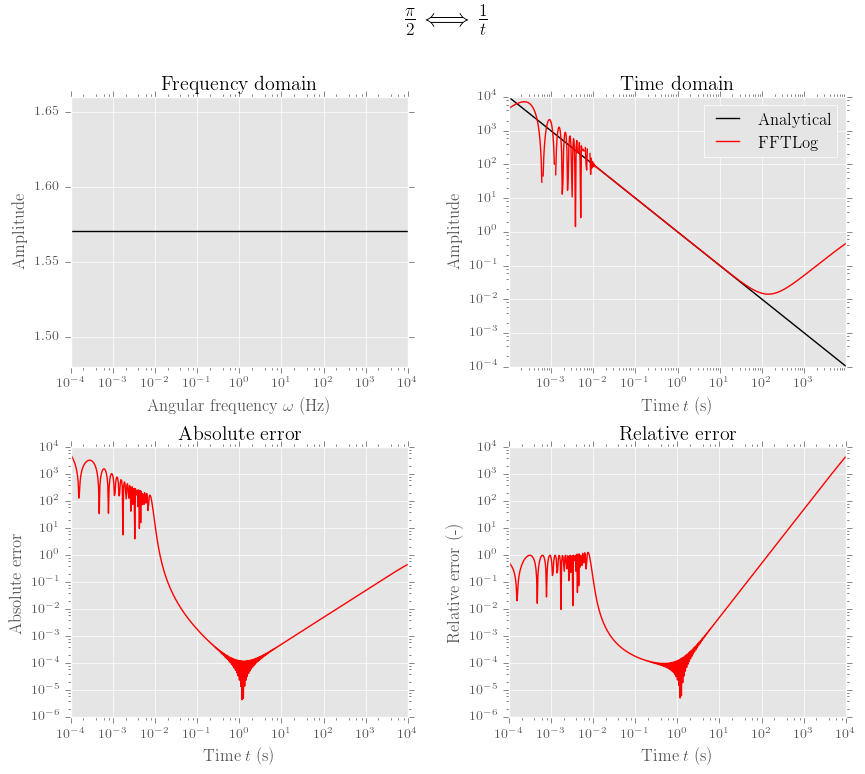

In [7]:
# Analytical solution
fw = np.pi/(2*np.ones(w.size))  # Frequency domain
ft = 1/t                        # Time domain
title = r'$\frac{\pi}{2} \Longleftrightarrow \frac{1}{t}$'

# FFTLog
fftl = fftpack.rfftl(fw, dlnr=dlnr, mu=0.5, q=q, kr=kr, rk=rk)
fftl *= 2/np.pi

# Print result
printfig(w, fw, t, ft, fftl, title)